# Introduction to Data Distributions with scipy module
## What's Covered
1. Understanding the Role of a Data Analyst
2. what is data distribution
3. why Study Data Distributions
4. Key characteristics of a Data Distributions
5. Types of Distributions
6. Import Libraries amd Creating Helper Functions
7. Shape of data Distribution
- Skewness ( độ lêch)
- Kurtosis ( độ nhọn)
8. Discrete Distribution ( rời rạc )
9. Continuous Đistribution ( liên tục )

In [1]:
! pip install scipy


# Shape of Data distribution
- Negative Skewness: If the tail of the distribution extends more to the left of the mean, the distribution is negatively skewed.
- Positive Skewness: If the tail of the distribution extends more to the right of the mean, the distribution is positively skewed.
- Zero Skewness: A symmetric distribution has zero skewness.
- if skewness is close to 0, the distribution is approximately symmetric.
If skewness is negative, the distribution is negatively skewed.
If skewness is positive, the distribution is positively skewed.

- Leptokurtic: A distribution with positive kurtosis indicates that the distribution has heavier tails and a sharper peak than a normal distribution.
- Mesokurtic: A distribution with zero excess kurtosis (i.e. close to 3 Kurtosis) indicates that it has similar tails and peak as a normal distribution.
- Platykurtic: A distribution with negative kurtosis indicates that the distribution has lighter tails and a flatter peak than a normal distribution.
- Kurtosis value equal to 3, the distribution is approximately having similar peakedness and tail behavior as a normal distribution.
Kurtosis values greater than 3 indicate leptokurtic distributions (i.e. Heavier Tail and Sharper Peak compared to Normal Distribution).
Kurtosis values less than 3 indicate platykurtic distributions (i.e. Lighter Tail and Flatter Peak).

## Bernoulli Distribution
- The Bernoulli distribution models a random experiment with two possible outcomes, often labeled as "Success" and "failure". It is characterized by a single parameter, which represent the probality of sucsess
- bernouli là thử 1 lần với xác suất P ( X ~ B(1, p)
- còn binomial là thử n lần với xác suất p ( X ~ B (n , p))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats



In [7]:
# Creating the helper functions for non visual analysis 
# hiểu đơn giản đây tạo ra danh sách list hoặc tạo bảng nên là non_visual
def discrete_non_viz_analysis(data):
    '''
    This function performs a complete statistical 
    analysis of discrete data (categorical and numerical).
    '''
    series = pd.Series(data)
    print(series.agg(['count', 'nunique', 'unique']))
    print('Value Counts: /n', series.value_counts())
    print()

def continuous_non_viz_analysis(data):
    '''
    This function performs a complete statistical 
    analysis of continuous numerical data.
    '''
    series = pd.Series(data)
    print(series.agg(['count', 'min', 'max', 'mean', 'median', 'var', 'std', 'skew', 'kurt']).round(2))
    print()

In [8]:
# Creating the helper Functions for visual analysis
# hiểu đơn giản tạo biểu đồ để quan sát tốt
def discrete_vis_analysis(data):
    fig, ax = plt.subplots(figsize = (5, 3), constrained_layout = True)
    fig.suptitle("Discrete Distribution Plot")
    ax.set_title("Count Plot")
    sns.countplot(x = data, ax = ax)
    plt.xticks(rotation = 45)
    plt.show()

def continuous_viz_analysis(data):
    '''
    This function performs a complete visual 
    analysis of continuous numerical data.
    '''

    fig, axes = plt.subplots(1, 3, figsize=(8, 3), constrained_layout=True)
    fig.suptitle("Continuous Distribution Plot")
    
    axes[0].set_title("Histogram Plot")
    sns.histplot(data, ax=axes[0])
    
    axes[1].set_title("KDE Plot")
    sns.kdeplot(data, fill=True, ax=axes[1])

    axes[2].set_title("Box Plot")
    sns.boxplot(data, ax=axes[2])

    plt.show()

## Bernoulli


- f(x) = p if x = 1 else 1 - p if x = 0

In [9]:
def bernoulli_distribution_generator(p, size):
    return np.random.binomial(n = 1, p = p, size = size)
    # trả về numpy với phần tử 0 thái bại, 1  thành công

bernoulli_dist = bernoulli_distribution_generator(p = 0.3, size = 10)
bernoulli_dist
    

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

count          10
nunique         2
unique     [0, 1]
dtype: object
Value Counts: 
 0    8
1    2
Name: count, dtype: int64



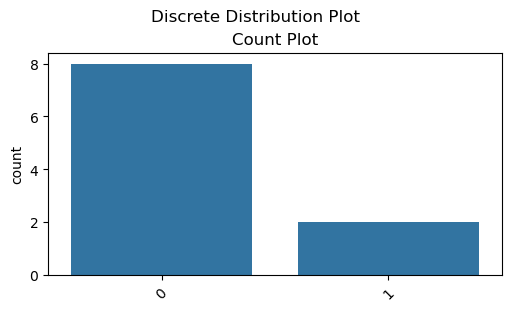

In [11]:
discrete_non_viz_analysis(data  = bernoulli_dist)
discrete_vis_analysis(data  =bernoulli_dist)

count       10000
nunique         2
unique     [0, 1]
dtype: object
Value Counts: 
 0    7038
1    2962
Name: count, dtype: int64



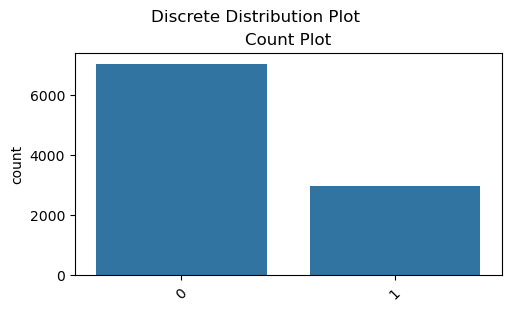

F(k=0): 0.7000000000000002
F(k=1): 0.3


In [15]:
# using scipy.stas to generate the bernoullu distribution

prob_success = 0.3

var = stats.bernoulli.rvs(p = prob_success, size = 10000)
# rvs trả về numpy giống trên à

discrete_non_viz_analysis(data=var)

discrete_vis_analysis(data  =var)

# caculatin pmf tính xác suất tại 1 điểm

# tính xác suất P (X = x)
print("F(k=0):", stats.bernoulli.pmf(k=0, p=prob_success))
print("F(k=1):", stats.bernoulli.pmf(k=1, p=prob_success))

## Binomial Distribution

In [16]:
def binomial_distribution_generator(n, p, size):
    return np.random.binomial(n = n, p = p, size = size)



count                               10000
nunique                                10
unique     [2, 6, 3, 5, 4, 1, 0, 8, 7, 9]
dtype: object
Value Counts: 
 3    2612
2    2333
4    2110
1    1194
5     988
6     354
0     295
7      95
8      18
9       1
Name: count, dtype: int64



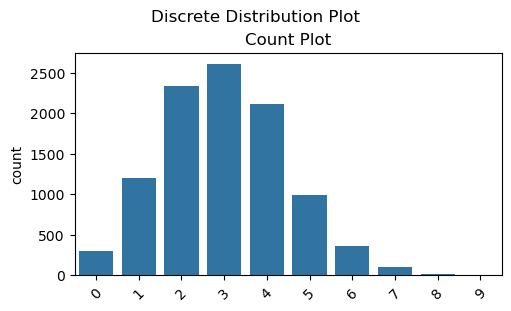

In [19]:
binomial_dist = binomial_distribution_generator(n=10, p=0.30, size=10000)

discrete_non_viz_analysis(data=binomial_dist)
discrete_vis_analysis(data = binomial_dist)

count                            10000
nunique                              9
unique     [3, 2, 4, 5, 1, 6, 0, 7, 8]
dtype: object
Value Counts: 
 3    2723
2    2350
4    1979
1    1212
5     967
6     386
0     277
7      91
8      15
Name: count, dtype: int64



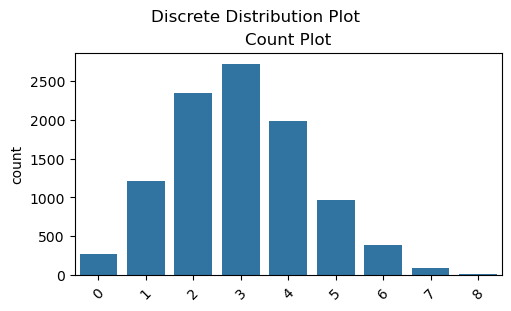

In [20]:
# using scipy.stats to generate the binomial distribution

n_trials = 10

prob_success = 0.30

var  = stats.binom.rvs(n = n_trials, p = prob_success, size = 10000)

discrete_non_viz_analysis(data = var)
discrete_vis_analysis(data = var)

In [21]:
print("Probability of 0 success out of 10 trials:", stats.binom.pmf(k=0, n=n_trials, p=prob_success))

print("Probability of 1 success out of 10 trials:", stats.binom.pmf(k=1, n=n_trials, p=prob_success))

print("Probability of 2 successes out of 10 trials:", stats.binom.pmf(k=2, n=n_trials, p=prob_success))

print("Probability of <= 2 sucess out of 10 trials:", stats.binom.cdf(k=2, n=n_trials, p=prob_success))

Probability of 0 success out of 10 trials: 0.0282475249
Probability of 1 success out of 10 trials: 0.12106082099999989
Probability of 2 successes out of 10 trials: 0.2334744405000001
Probability of <= 2 sucess out of 10 trials: 0.38278278639999974


In [22]:
# hiểu đơn giản pmf là xác suất tại điểm đó
# cdf là xác suất lien tục tài điểm đó tình cả <= nó
# vị dụ xác suất cdf tại 3 thì tính cả x = 0, 1, 2, 3

## Poisson Distribution
- The poisson distributrion model the number of events that occure in a fixed interval of time or space, assuming events occur at a constant rate(lambda) and are independent of the time since the last event. Eg:
- Khách hàng đến tại một chi nhánh ngân hàng mỗi giờ - trung bình, một chi nhánh ngân hàng nhận được 30 khách hàng mỗi giờ. Ở đây λ = 30 (nghĩa là số lượng khách hàng trung bình đến mỗi giờ)

- X ~ P(lambda)
- f(x) = (e mũ trừ lambda) * (lambda ^ x / x!)

count                                                  10000
nunique                                                   43
unique     [39, 32, 28, 35, 30, 38, 29, 26, 31, 23, 42, 2...
dtype: object
Value Counts: 
 29    738
28    717
30    714
31    701
27    668
32    662
33    589
26    587
25    524
34    499
35    457
24    423
36    395
23    300
37    295
22    273
38    261
21    190
39    190
20    137
40    131
19     95
41     90
42     70
18     63
43     59
44     39
17     31
45     19
16     15
46     15
15     11
47     11
48      9
49      7
14      6
13      2
51      2
11      1
12      1
54      1
50      1
52      1
Name: count, dtype: int64



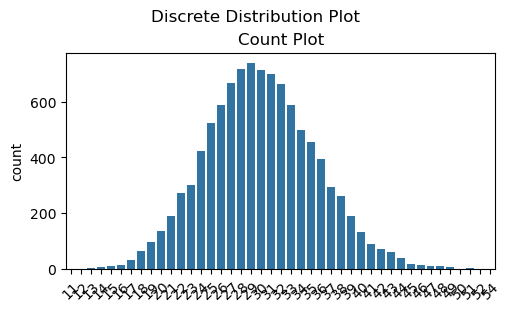

In [25]:
def poisson_distribution_generator(lam, size):
    # lambda số lần xảy ra sự kiện mỗi đơn vị
    return np.random.poisson(lam = lam, size = size)

poisson_dist = poisson_distribution_generator(lam = 30, size = 10000)

discrete_non_viz_analysis(data=poisson_dist)

discrete_vis_analysis(data = poisson_dist)

In [26]:
continuous_non_viz_analysis(poisson_dist)



count     10000.00
min          11.00
max          54.00
mean         30.01
median       30.00
var          30.22
std           5.50
skew          0.20
kurt          0.08
dtype: float64



count                                                  10000
nunique                                                   42
unique     [26, 34, 20, 30, 21, 36, 40, 33, 22, 27, 41, 3...
dtype: object
Value Counts: 
 29    747
28    724
31    703
27    694
30    685
32    618
26    605
33    586
25    527
34    527
35    459
24    401
36    382
23    347
37    290
22    271
38    241
21    202
39    176
40    144
20    141
41     93
19     79
42     73
18     54
43     44
44     40
17     35
45     24
46     19
16     17
48     13
15     12
14      9
49      4
50      3
13      3
47      2
12      2
11      2
57      1
56      1
Name: count, dtype: int64



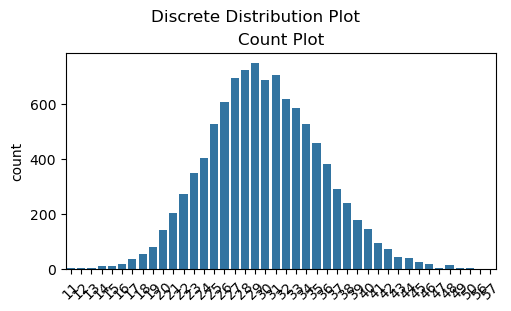

Probability of 20 events happening, given that on an average 30 events happen: 0.013411150012837837
Probability of 25 events happening, given that on an average 30 events happen: 0.05111533742894147
Probability of 35 events happening, given that on an average 30 events happen: 0.045308200086552224
Probability of <= 35 events happening, given that on an average 30 events happen:: 0.8426165255696685


In [30]:
# using scipy.stats to generate the poisson distribution
lambda_ = 30

var = stats.poisson.rvs(lambda_, size = 10000)
discrete_non_viz_analysis(data = var)
discrete_vis_analysis(data = var)
# Computing PMF and CDF

print("Probability of 20 events happening, given that on an average 30 events happen:", stats.poisson.pmf(k=20, mu=lambda_))

print("Probability of 25 events happening, given that on an average 30 events happen:", stats.poisson.pmf(k=25, mu=lambda_))

print("Probability of 35 events happening, given that on an average 30 events happen:", stats.poisson.pmf(k=35, mu=lambda_))

print("Probability of <= 35 events happening, given that on an average 30 events happen::", stats.poisson.cdf(k=35, mu=lambda_))

# Conclustion discrete distribution ( phân bố rời rạc)
- The bernoulli distribution can model binary outcomes like pass/fail
- the binomial distribution can model the number of successes in a fixed number of trial
- the Poisson distribution can model the occurence of events over a specific time frame ( 1 khoảng thười gian cụ thể)

# Continuous Distribution

## Uniform Distribution ( phân phối đồng nhất ) 
- In a uniform distribution, all outcomes are equally likely within a specified range
- X ~ U(a, b)
- f(x) = 1 / (b - a) if a <= x <=b else 0

In [38]:
def uniform_distribution_generator(low, high, size):
    return np.random.uniform(low = low, high = high, size = size)

count     10000.00
min          10.01
max          40.00
mean         25.00
median       24.98
var          75.61
std           8.70
skew          0.00
kurt         -1.21
dtype: float64



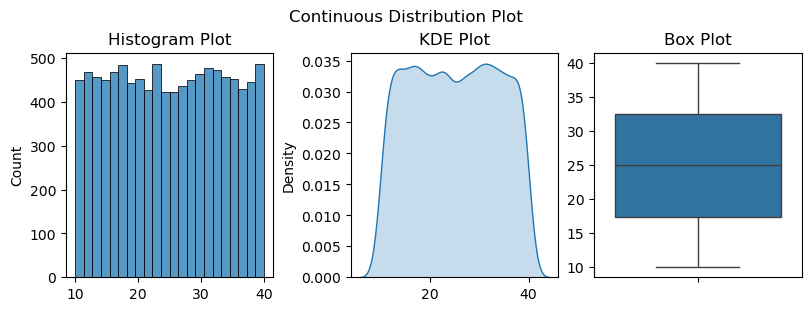

In [39]:
uniform_dist = uniform_distribution_generator(low = 10, high = 40, size=10000)

continuous_non_viz_analysis(data=uniform_dist)

continuous_viz_analysis(data=uniform_dist)

count     10000.00
min          10.01
max          50.00
mean         30.04
median       29.84
var         132.46
std          11.51
skew          0.01
kurt         -1.20
dtype: float64



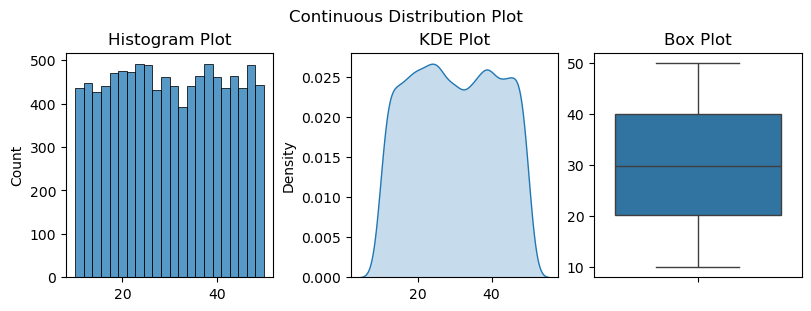

In [41]:
# using scipy.stats to generate the uniform distribution 
low , high = 10, 40

var = stats.uniform.rvs(loc = low, scale = high, size = 10000)
# hiểu đơn giản loc là vị trí bắt đầu còn scale là khoảng cách 
# loc = 10, scale = 5 => [10, 15)
continuous_non_viz_analysis(data = var)
continuous_viz_analysis(data = var)

In [43]:
# pdf dùng cho biến ngẫu nhiên liên cục dùng để tính mật độ xác suất tại điểm đó chứ
# khác với pmf của rời rạc là tính xác suất cụ thể tại điểm đó
# Computing PDF and CDF

print("F(x=0):", stats.uniform.pdf(x=0, loc=low, scale=high))

print("F(x=0):", stats.uniform.pdf(x=10, loc=low, scale=high))
print("F(x=0):", stats.uniform.pdf(x=20, loc=low, scale=high))
print("F(x=0):", stats.uniform.cdf(x=30, loc=low, scale=high))

F(x=0): 0.0
F(x=0): 0.025
F(x=0): 0.025
F(x=0): 0.5


In [44]:
# Percent point functionn(Inverse of cdf) ngược lại với cdf

stats.uniform.ppf(q = 0.25, loc = low, scale = high)

20.0

## Normal Distribution and 68 - 96, 99,7% Rule ( Phân phối chuẩn)/
- the Normal distribution is characterized by its bell-shaped curved and is widly ysed in various field
- this distribution can be describe by its mean and standard deviation, providing insight into the central tendency and spread of the data.
- muy là kỳ vọng hiểu đơn giản là trung bình
- phương sai là bình phương của độ lệch chuẩn

In [46]:
def normal_distribution_generator(mean, std, size):
    return np.random.normal(loc = mean, scale = std, size = size)
    # loc là mean và scale là std
    

count     1000.00
min       -126.36
max        170.44
mean        10.13
median       9.32
var       1676.54
std         40.95
skew         0.13
kurt         0.27
dtype: float64



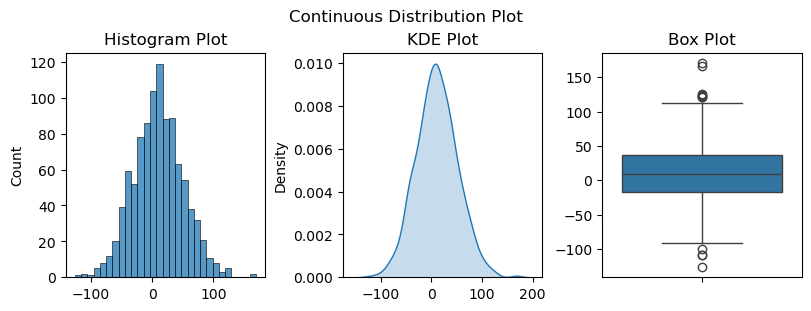

In [47]:
normal_dist = normal_distribution_generator(mean = 10, std = 40, size = 1000)
continuous_non_viz_analysis(data=normal_dist)

continuous_viz_analysis(data=normal_dist)

count     10000.00
min        -136.96
max         188.24
mean         10.34
median       10.37
var        1588.04
std          39.85
skew         -0.01
kurt          0.06
dtype: float64



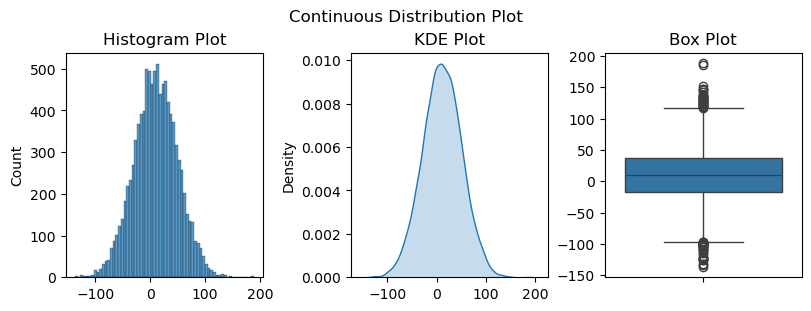

F(x=0): 0.009666702920071232
F(x=20): 0.009666702920071232
F(x=30): 0.008801633169107488
F(x<=10): 0.5


In [49]:
# using scipy.stats to generate the normal distribution

mean = 10
std = 40

var = stats.norm.rvs(loc = mean, scale = std, size = 10000)

continuous_non_viz_analysis(data = var)
continuous_viz_analysis(data = var)
# Computing PDF and CDF

print("F(x=0):", stats.norm.pdf(x=0, loc=mean, scale=std))

print("F(x=20):", stats.norm.pdf(x=20, loc=mean, scale=std))

print("F(x=30):", stats.norm.pdf(x=30, loc=mean, scale=std))

print("F(x<=10):", stats.norm.cdf(x=10, loc=mean, scale=std))

In [53]:
# Percent point function (inverse of cdf)

stats.norm.ppf(q=0.5, loc=mean, scale=std
              )

10.0

In [54]:
normal_dist

array([ 5.85040019e+01, -3.83041441e+00,  5.57039428e+01,  5.47219075e+01,
        3.05253836e+01, -4.14597560e+01,  4.15630664e+01,  7.71602379e+01,
       -6.58611561e+00,  2.50085503e+01,  5.71281231e+01, -1.25640984e+01,
        1.31463746e+01,  7.49343056e+01, -2.26361211e+00,  2.63743807e+01,
        1.34005625e+01,  1.58738962e+01, -7.59540515e+00,  8.74437498e+00,
       -1.31459129e+01, -1.75773035e+01,  1.21437318e+02,  4.77284882e+01,
        1.12873163e+01, -3.16038477e+01,  1.20049006e+00,  3.78239663e+01,
       -3.02966393e+01,  1.44783439e+01, -3.00524839e+01,  7.03467321e+01,
        5.95230314e+01,  1.90701182e+01,  2.42658145e+01,  5.71843109e+01,
       -3.71485474e+01,  3.33365422e+01,  7.27267805e+01, -5.03981654e+01,
        4.96615031e+01,  8.27374788e+01, -6.44637743e+00,  2.07633618e+01,
        4.82069206e+01, -7.76860484e+00,  4.51290109e+01, -4.63713093e+01,
       -5.28956443e+01,  1.60786180e+01, -1.54256630e+01,  4.73097950e+01,
       -1.15444162e+01,  

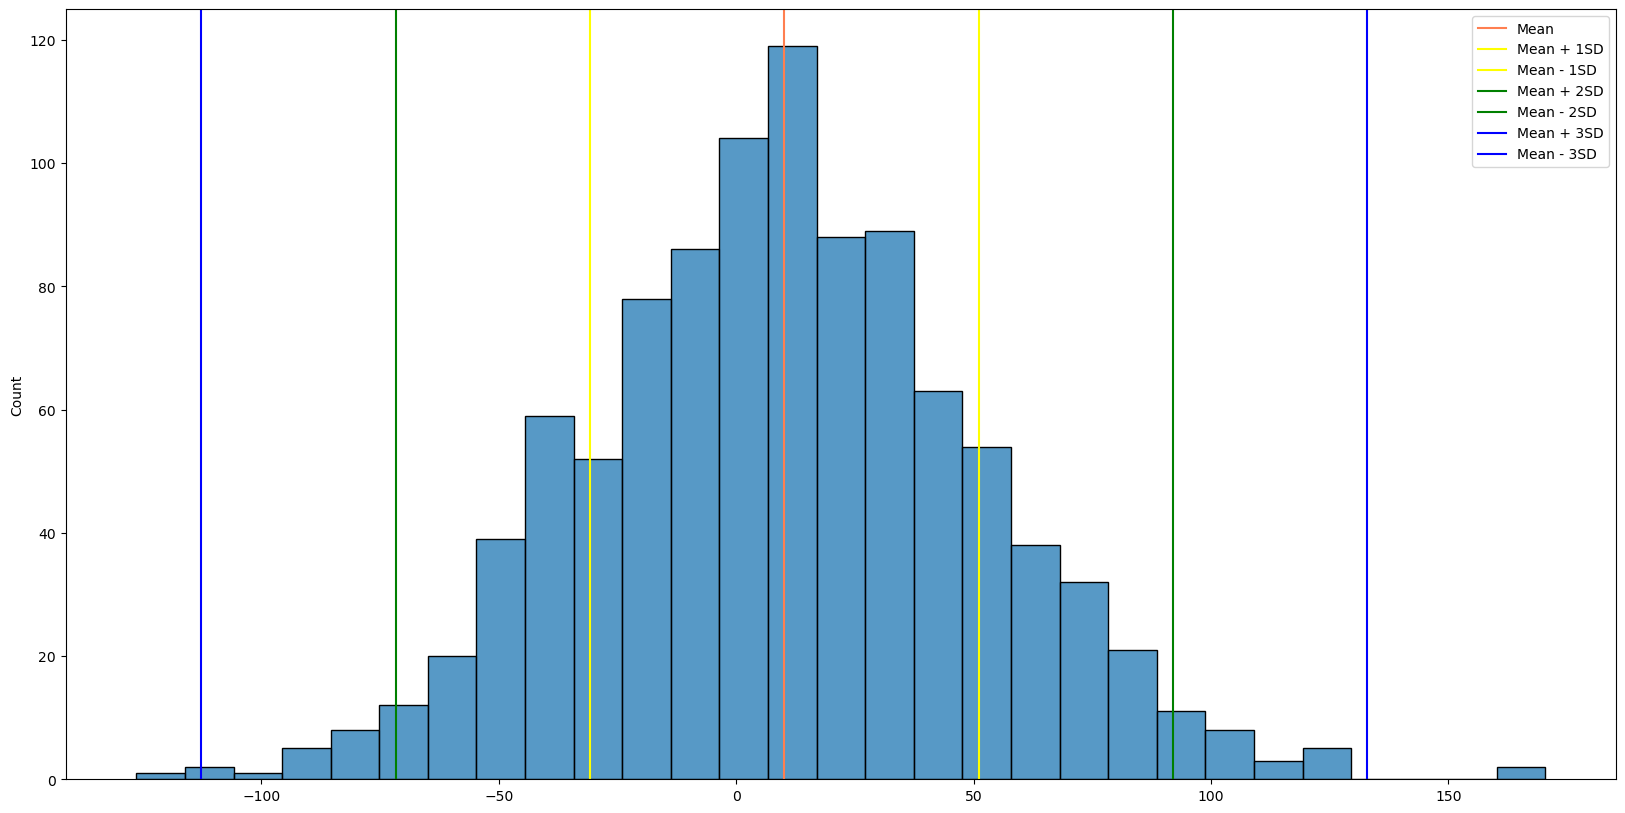

In [55]:
plt.figure(figsize=(20,10))

sns.histplot(normal_dist)

plt.axvline(normal_dist.mean(), color='coral', label='Mean')

plt.axvline(normal_dist.mean() + (1 * normal_dist.std()), color='yellow', label='Mean + 1SD')
plt.axvline(normal_dist.mean() - (1 * normal_dist.std()), color='yellow', label='Mean - 1SD')
plt.axvline(normal_dist.mean() + (2 * normal_dist.std()), color='green', label='Mean + 2SD')
plt.axvline(normal_dist.mean() - (2 * normal_dist.std()), color='green', label='Mean - 2SD')
plt.axvline(normal_dist.mean() + (3 * normal_dist.std()), color='blue', label='Mean + 3SD')
plt.axvline(normal_dist.mean() - (3 * normal_dist.std()), color='blue', label='Mean - 3SD')

plt.legend()

plt.show()

## Exponential Distribution
- The exponential distribution models the time util an event occurs in a Poisson process where event occur continuouse ly and independently at a constant avarage rate( lambda)
- eg
- Time betweeen Customer Arrivals
- modeling waiting times, such as the time between phone calls at a call center
- X ~ E(lambda)
- F(X) = lambda * exp(-lambda.x) if x > 0 else 0

In [56]:
def exponential_distribution_generator(lam, size):
    return np.random.exponential(scale = 1 / lam, size = size)
    

count     10000.00
min           0.00
max           1.90
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.90
kurt          5.11
dtype: float64



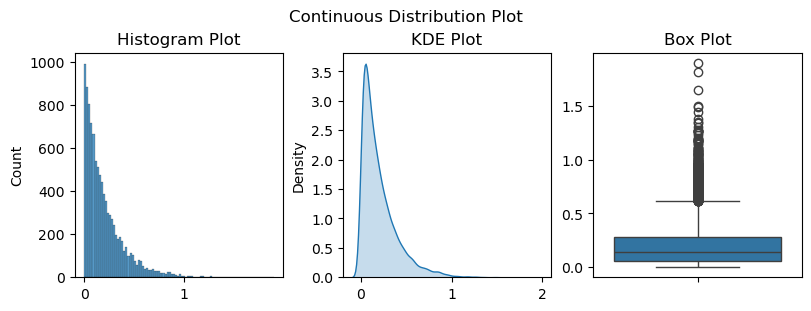

In [57]:
exponential_dist = exponential_distribution_generator(lam = 5, size = 10000)
continuous_non_viz_analysis(data=exponential_dist)

continuous_viz_analysis(data=exponential_dist)

count     10000.00
min           0.00
max           2.06
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.91
kurt          5.07
dtype: float64



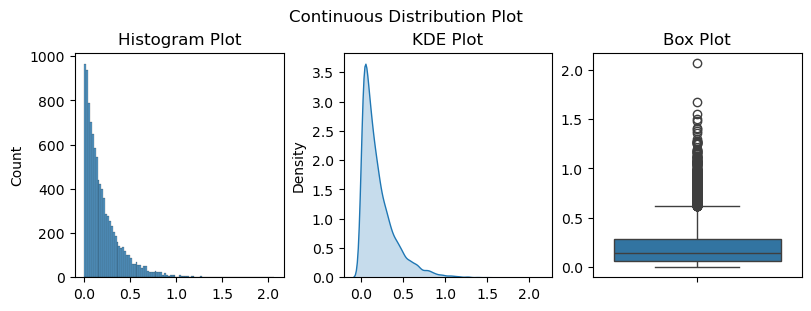

F(x=0.5): 0.410424993119494
F(x=0.75): 0.11758872928004553
F(x=0.90): 0.055544982691211525
F(x<=1): 0.9932620530009145


In [59]:
# using scipy.stats to generate the normal distribution

lambda_ = 5

var = stats.expon.rvs(scale = 1/lambda_, size = 10000)
continuous_non_viz_analysis(data=var)

continuous_viz_analysis(data=var)
# Computing PDF and CDF

print("F(x=0.5):", stats.expon.pdf(x=0.5, scale=1/lambda_))

print("F(x=0.75):", stats.expon.pdf(x=0.75, scale=1/lambda_))

print("F(x=0.90):", stats.expon.pdf(x=0.90, scale=1/lambda_))

print("F(x<=1):", stats.expon.cdf(x=1, scale=1/lambda_))

In [60]:
# Percent point function (inverse of cdf)

stats.expon.ppf(q=0.994, scale=1/lambda_)

1.0231991619508163

# Conclusion
### I Learned
- Bernoulli(p, size)
- binomial ~ n (n, p, size) same bernoulli
- Poisson(lam, size)
- uniform(low, high, size) # 1 / b - a
- Normal (mean, sstd, size) ( loc = mean, scale = std, size = size) phân phối chuẩn
- Exponential ( lam, size) ( scale = 1 / lam, size = size)
- 

# Case Study

In [61]:
# Trường hợp nghiên cứu
# Kịch bản: Thiết lập một cửa hàng may mặc
# Bạn của bạn đang bắt đầu cuộc hành trình thành lập một cửa hàng may mặc. Ra mắt một doanh nghiệp mới với các quỹ hạn chế đòi hỏi lập kế hoạch tỉ mỉ, tháo vát và hiểu biết sâu sắc về thị trường. Đối với giai đoạn ban đầu, bạn của bạn đã quyết định chỉ tập trung vào một sản phẩm - quần jean và đang đầu tư 100.000 INR vào hàng tồn kho.

# Câu hỏi: Ngân sách có sẵn nên được phân bổ cho hàng tồn kho như thế nào?
# Trả lời: Xác định phân bổ ngân sách tối ưu có thể là một chút thách thức mà không cần phân tích thị trường kỹ lưỡng. Một đề xuất sơ bộ có thể là phân bổ 50.000 INR cho cả khách hàng nam và nữ.

# Tuy nhiên, điều gì sẽ xảy ra nếu có sự khan hiếm của khách hàng nam? 😱

# May mắn thay, bạn của bạn có bạn, một người bạn thân đáng tin cậy, cũng là một nhà khoa học dữ liệu thành công. Phân bổ ngân sách có thể dựa vào nhiều yếu tố như:

# Tách giới tính:
# Vì bạn của bạn đang cung cấp quần jean, nên việc xem xét việc phân chia giới tính ở khách hàng tiềm năng là điều cần thiết. Điều này sẽ giúp xác định cách phân bổ ngân sách một cách hiệu quả.

# Cân nhắc kích thước:
# Các loại cơ thể và kích thước khác nhau nên được tính đến. Nó có thể có lợi để phân bổ một phần ngân sách cho một loạt các quy mô đa dạng.

# Hóa ra bạn đã thu thập một số dữ liệu. Kiểm tra nó dưới đây:

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/height_gender_data.csv")
df.head()

,Unnamed: 0,height,gender
0,0,142.905550,Male
1,1,115.598717,Male
2,2,138.027187,Female
3,3,130.939245,Male
4,4,125.079458,Female


In [66]:
# Redundant column Unname: 0
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()
# deleted this

,height,gender
0,142.905550,Male
1,115.598717,Male
2,138.027187,Female
3,130.939245,Male
4,125.079458,Female


## Domain Knowledge ( kiến thức miền)
Let's assume you with the help of an expert got the following information about jeans size and height ranges for both the genders. Consider the following chart for better Budget Allocation.

Group	Small	Medium	Large
Female Heights	[120, 136.61]	[136.61 to 153.41]	[154.41 to 170]
Male Heights	[99.87, 129.87]	[129.97, 160.07]	[160.07, 190.17]


## Verify the Type of Distribution - QQ Plot



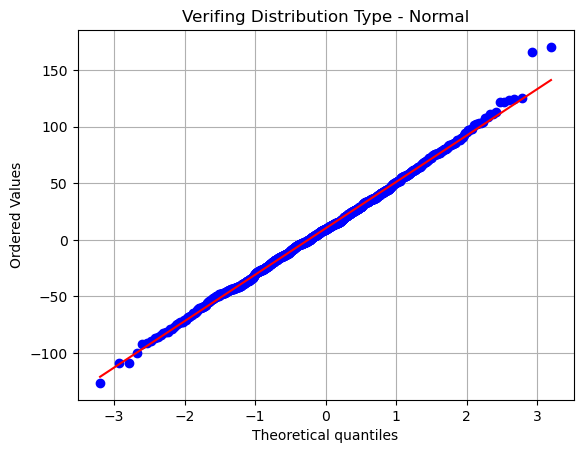

In [67]:
stats.probplot(normal_dist, dist=stats.norm, plot=plt)

plt.title("Verifing Distribution Type - Normal")

plt.grid()

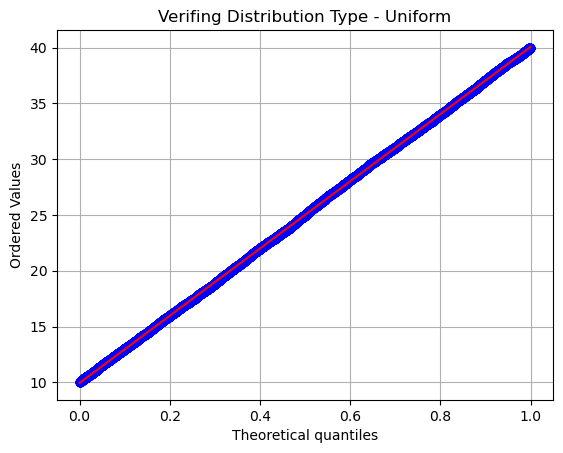

In [71]:
stats.probplot(uniform_dist, dist=stats.uniform, plot=plt)

plt.title("Verifing Distribution Type - Uniform")

plt.grid()

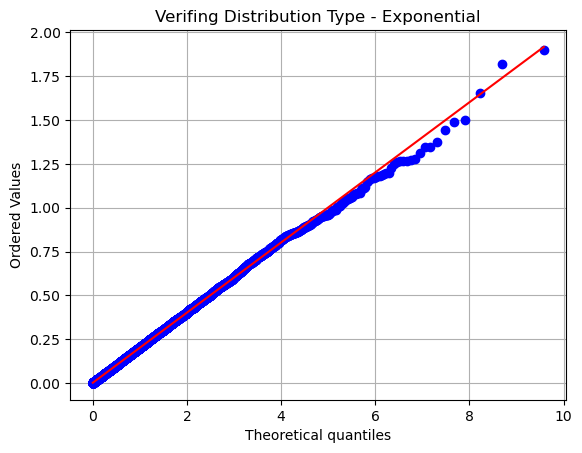

In [72]:
stats.probplot(exponential_dist, dist=stats.expon, plot=plt)

plt.title("Verifing Distribution Type - Exponential")

plt.grid()

NameError: name 'pareto_dist' is not defined

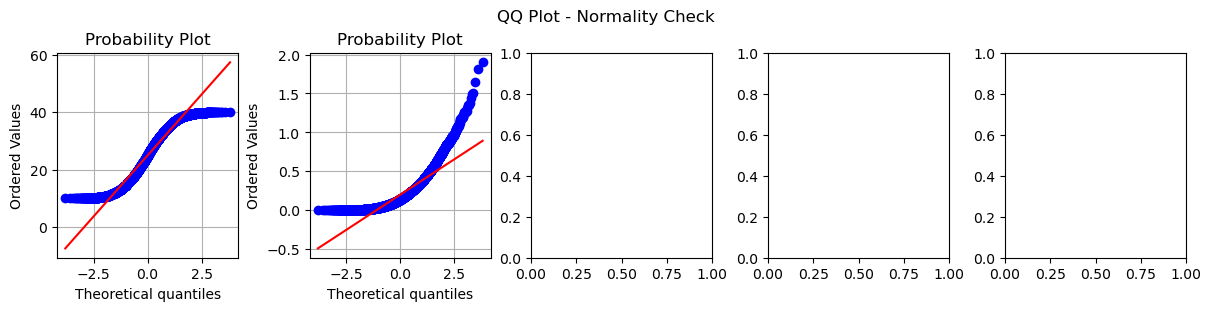

In [73]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
fig.suptitle("QQ Plot - Normality Check")

stats.probplot(uniform_dist, dist=stats.norm, plot=axes[0])
axes[0].grid()

stats.probplot(exponential_dist, dist=stats.norm, plot=axes[1])
axes[1].grid()

stats.probplot(pareto_dist, dist=stats.norm, plot=axes[2])
axes[2].grid()

stats.probplot(lognormal_dist, dist=stats.norm, plot=axes[3])
axes[3].grid()

stats.probplot(normal_dist, dist=stats.norm, plot=axes[4])
axes[4].grid()

plt.show()

# Feature Engineering 
## Feature Scaling
1. Min-Max scalling(normalization)
2. z - transformation(Standardization)

count     1000.00
min       -126.36
max        170.44
mean        10.13
median       9.32
var       1676.54
std         40.95
skew         0.13
kurt         0.27
dtype: float64



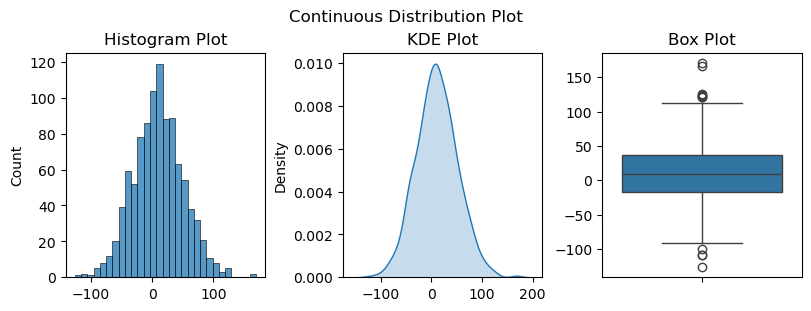

In [74]:
continuous_non_viz_analysis(data=normal_dist)

continuous_viz_analysis(data=normal_dist)

count     10000.00
min           0.00
max           1.90
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.90
kurt          5.11
dtype: float64



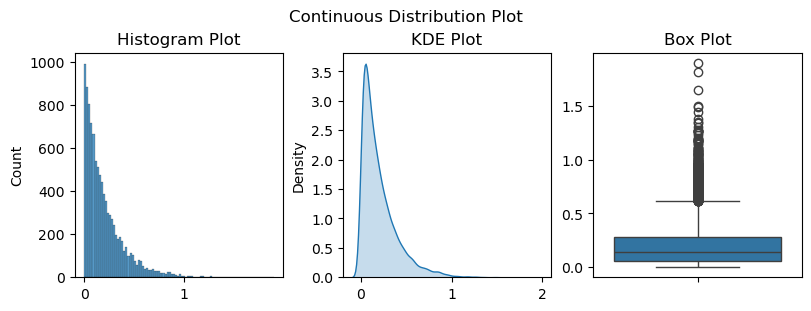

In [75]:
continuous_non_viz_analysis(data=exponential_dist)

continuous_viz_analysis(data=exponential_dist)

<Axes: ylabel='Count'>

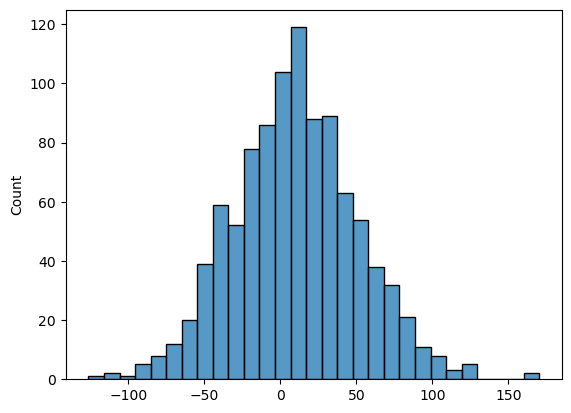

In [77]:
sns.histplot(normal_dist)


<Axes: ylabel='Count'>

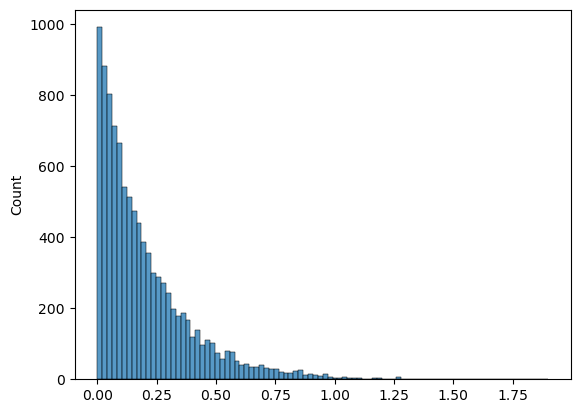

In [78]:
sns.histplot(exponential_dist)

<Axes: ylabel='Count'>

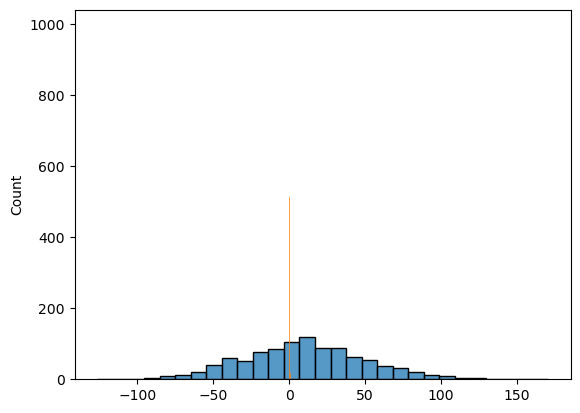

In [81]:
sns.histplot(normal_dist)
sns.histplot(exponential_dist)

## Min - Max scaling(Normalization)



In [88]:
def min_max_scaler(data):
    min_value = np.min(data)
    max_value = np.max(data)
    return (data - min_value) / (max_value - min_value)
# đưa về thang đo [0 1] x = x - min / (x max - x min)

In [83]:
normal_dist_transformed = min_max_scaler(normal_dist)
normal_dist_transformed

array([0.62284945, 0.41282692, 0.61341525, 0.61010649, 0.52858146,
       0.28604287, 0.56577058, 0.68570766, 0.40354217, 0.50999367,
       0.61821372, 0.38340063, 0.47002659, 0.67820786, 0.41810593,
       0.51459554, 0.47088302, 0.4792164 , 0.40014159, 0.45519499,
       0.38144033, 0.36650971, 0.83488985, 0.58654365, 0.46376289,
       0.31925026, 0.42977748, 0.55317248, 0.32365462, 0.47451438,
       0.32447724, 0.66275101, 0.62628285, 0.48998538, 0.50749118,
       0.61840303, 0.30056857, 0.53805306, 0.67077007, 0.25592681,
       0.59305654, 0.70449899, 0.40401299, 0.49569041, 0.58815563,
       0.39955803, 0.57778527, 0.26949444, 0.24751208, 0.47990616,
       0.3737592 , 0.58513296, 0.38683623, 0.54304057, 0.46048778,
       0.27519373, 0.27878684, 0.36024143, 0.49283783, 0.46240954,
       0.42544347, 0.54706481, 0.58238671, 0.22425809, 0.39120514,
       0.51808371, 0.16575485, 0.11660187, 0.34228812, 0.38460791,
       0.46986164, 0.44604782, 0.22733236, 0.63760772, 0.43668

count     1000.00
min          0.00
max          1.00
mean         0.46
median       0.46
var          0.02
std          0.14
skew         0.13
kurt         0.27
dtype: float64



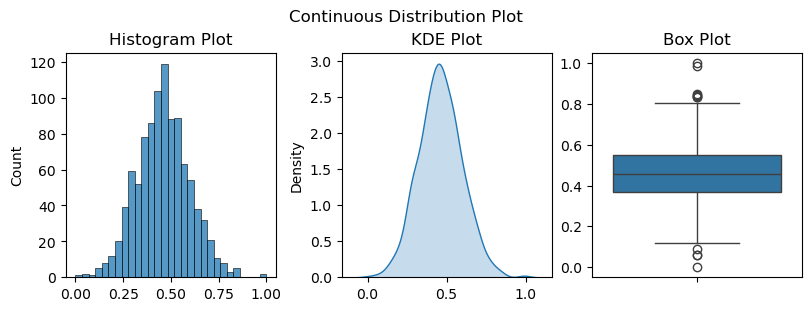

In [84]:
continuous_non_viz_analysis(data=normal_dist_transformed)

continuous_viz_analysis(data=normal_dist_transformed)

count     10000.00
min           0.00
max           1.00
mean          0.11
median        0.07
var           0.01
std           0.11
skew          1.90
kurt          5.11
dtype: float64



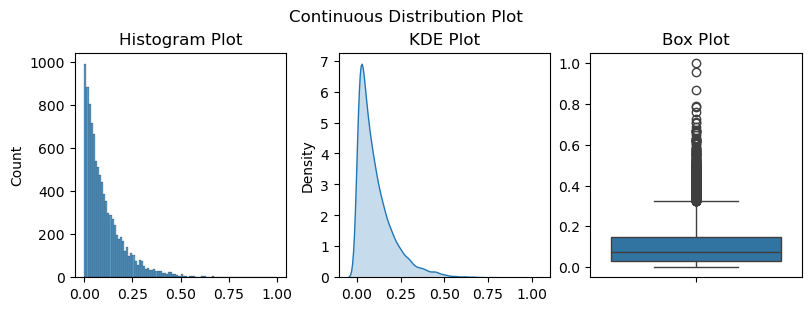

In [86]:
exponential_dist_transformed = min_max_scaler(exponential_dist)

continuous_non_viz_analysis(data=exponential_dist_transformed)

continuous_viz_analysis(data=exponential_dist_transformed)

<Axes: ylabel='Count'>

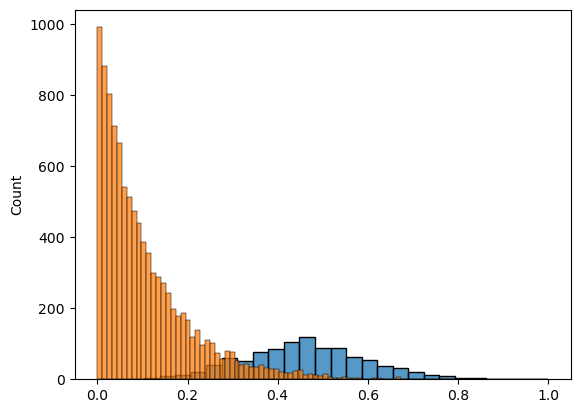

In [87]:
sns.histplot(normal_dist_transformed)
sns.histplot(exponential_dist_transformed)

## Z - transformation (Standardization)

In [89]:
# là một hàm chuẩn hóa dữ liệu theo pp Z - standardization
# đưa dữ liệu về trung bình  = 0,  độ lẹch chuẩn  = 1

def z_transformer(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / (std)

count     1000.00
min         -3.34
max          3.92
mean         0.00
median      -0.02
var          1.00
std          1.00
skew         0.13
kurt         0.27
dtype: float64



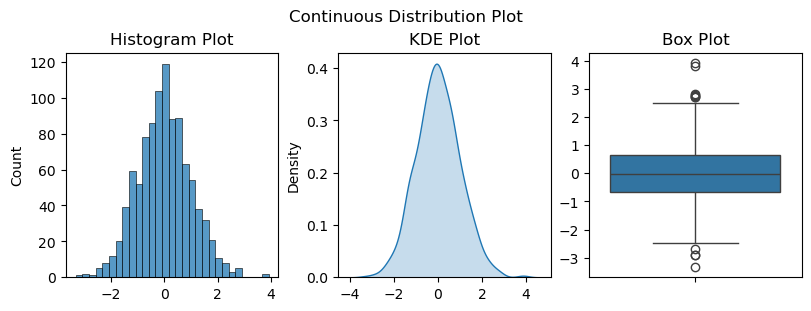

In [90]:
normal_dist_transformed = z_transformer(normal_dist)

continuous_non_viz_analysis(data=normal_dist_transformed)

continuous_viz_analysis(data=normal_dist_transformed)

<Axes: ylabel='Count'>

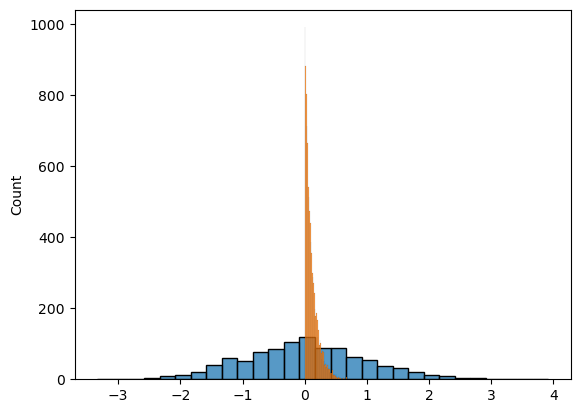

In [91]:
sns.histplot(normal_dist_transformed)
sns.histplot(exponential_dist_transformed)